<a href="https://colab.research.google.com/github/aleksanderprofic/Machine-Learning/blob/master/Clustering/Hierarchical/mall_customers_agglomerative_hierarchical_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Hierarchical Clustering

## Data preprocessing

### Importing the libraries

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Loading the dataset

In [20]:
dataset = pd.read_csv('Mall_Customers.csv')
dataset.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


### Taking only two features from the dataset

Just to make a 2D plot later (we need at most 2 features to do it)

In [21]:
X = dataset.iloc[:, -2:]
X.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


In [22]:
X = X.values

### Using the dendrogram to find the optimal number of clusters

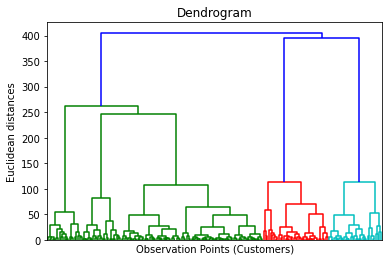

In [23]:
import scipy.cluster.hierarchy as sch

# 'ward' - minimizing the variance inside the clusters
dendrogram = sch.dendrogram(sch.linkage(X, method='ward'))
plt.title('Dendrogram')
plt.xlabel('Observation Points (Customers)')
plt.ylabel('Euclidean distances')
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    # bottom=False,      # ticks along the bottom edge are off
    # top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off
plt.show()

The optimal number of clusters for 2 features seems to be 3 or 5. \
K-Means algorithm chose 5 as the optimal number of clusters, that's why here I will also choose 5

## Training

### Training the Hierarchical model using the optimal number of clusters

In [24]:
from sklearn.cluster import AgglomerativeClustering

hc = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
y_hc = hc.fit_predict(X)
print(y_hc)

[4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4
 3 4 3 4 3 4 1 4 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 1 2 0 2 0 2 1 2 0 2 0 2 0 2 0 2 1 2 0 2 1 2
 0 2 0 2 0 2 0 2 0 2 0 2 1 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2]


## Data visualisation

### Visualising the clusters

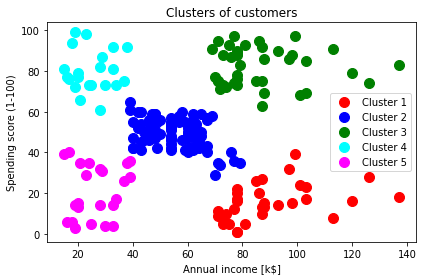

In [25]:
indices_of_cluster_0 = y_hc == 0
indices_of_cluster_1 = y_hc == 1
indices_of_cluster_2 = y_hc == 2
indices_of_cluster_3 = y_hc == 3
indices_of_cluster_4 = y_hc == 4

plt.scatter(x=X[indices_of_cluster_0, 0], y=X[indices_of_cluster_0, 1], s=100, c='red', label='Cluster 1')
plt.scatter(x=X[indices_of_cluster_1, 0], y=X[indices_of_cluster_1, 1], s=100, c='blue', label='Cluster 2')
plt.scatter(x=X[indices_of_cluster_2, 0], y=X[indices_of_cluster_2, 1], s=100, c='green', label='Cluster 3')
plt.scatter(x=X[indices_of_cluster_3, 0], y=X[indices_of_cluster_3, 1], s=100, c='cyan', label='Cluster 4')
plt.scatter(x=X[indices_of_cluster_4, 0], y=X[indices_of_cluster_4, 1], s=100, c='magenta', label='Cluster 5')
plt.title("Clusters of customers")
plt.xlabel("Annual income [k$]")
plt.ylabel("Spending score (1-100)")
plt.legend()
plt.tight_layout()
plt.show()